# Blackjack game

In [1]:
import sys

sys.path.insert(0, "../")

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

from rl_algorithms.blackjack_fixed_alpha_montecarlo_policy import (
    constant_alpha_montecarlo,
)
from simulations.blackjack import play_game_with_strategy, play_game_without_strategy, deck, deck_values

# Playing blackjack with no strategy but hitting

In [3]:
outcomes = []
for _ in tqdm(range(1_000_000)):
    outcomes.append(play_game_without_strategy(deck, deck_values))

100%|██████████| 1000000/1000000 [00:02<00:00, 350092.48it/s]


In [4]:
values, counts = np.unique(outcomes, return_counts=True)

for value, count in zip(values, counts):
    print(f"Value: {value}, Count: {count}, Probability: {count/len(outcomes):.2%}")

Value: -1, Count: 822325, Probability: 82.23%
Value: 0, Count: 21331, Probability: 2.13%
Value: 1, Count: 156344, Probability: 15.63%


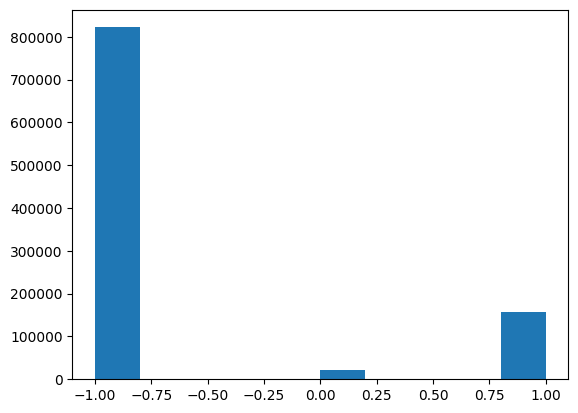

In [5]:
plt.hist(outcomes)
plt.show()

# Developing a strategy to improve.

In [6]:
epsilon = 0.1
alpha = 1 / 5_000
episode_number = 10_000_000

In [14]:
print(f"Running {episode_number:,} episodes of constant alpha montecarlo episodes with epsilon {epsilon} and alpha {alpha}.")

Running 10,000,000 episodes of constant alpha montecarlo episodes with epsilon 0.1 and alpha 0.0002.


In [7]:
optimal_policy = constant_alpha_montecarlo(
    epsilon = epsilon, 
    episodes= episode_number, 
    learning_rate=alpha, 
    deck = deck, 
    deck_values=deck_values, 
    play_game=play_game_with_strategy
)

100%|██████████| 10000000/10000000 [00:35<00:00, 283561.32it/s]


In [10]:
outcomes = []
for _ in tqdm(range(1_000_000)):
    outcome, player_state_action_history = play_game_with_strategy(
        deck, deck_values, optimal_policy
    )
    outcomes.append(outcome)

100%|██████████| 1000000/1000000 [00:03<00:00, 312125.56it/s]


In [11]:
values, counts = np.unique(outcomes, return_counts=True)

for value, count in zip(values, counts):
    print(f"Value: {value}, Count: {count}, Probability: {count/len(outcomes):.2%}")

Value: -1, Count: 498617, Probability: 49.86%
Value: 0, Count: 88775, Probability: 8.88%
Value: 1, Count: 412608, Probability: 41.26%


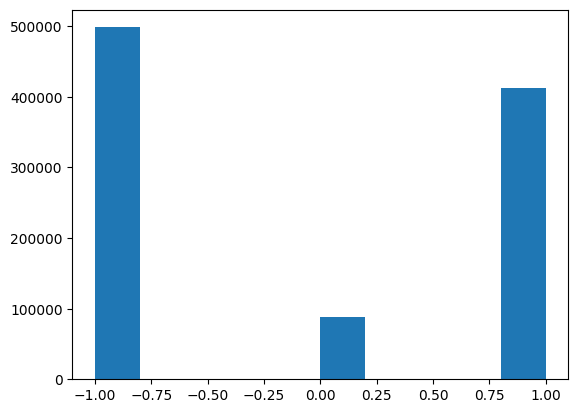

In [12]:
plt.hist(outcomes)
plt.show()